In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import copy

FLIPSIZE = 5

### UNDERLYING EDGES FOR THE GRAPH

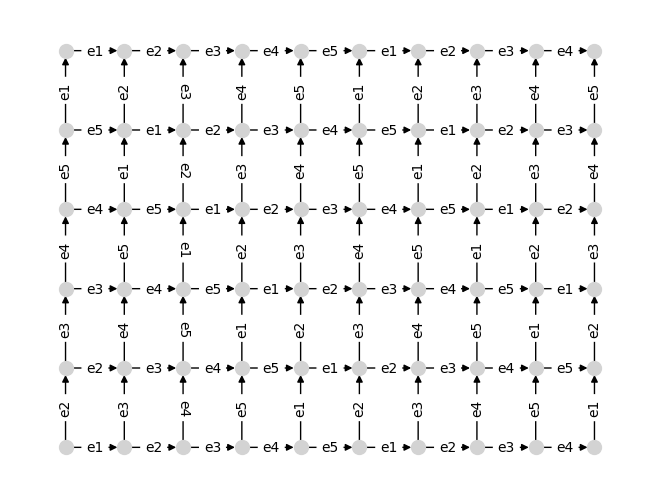

In [19]:
GMAIN = nx.DiGraph()
possibleLables = ["e1","e2","e3","e4","e5"]

rows=6
cols=10
for i in range(rows):
    for j in range(cols):
        node = (i, j)
        GMAIN.add_node(node)

for i in range(rows):
    for j in range(cols): 
        node = (i,j)
        if (j!=cols-1):
            neighbor = (i,j+1)
            GMAIN.add_edge(node,neighbor)
            if i%5 == 0:
                GMAIN[node][neighbor]['label'] = possibleLables[(5+j)%5]
            if i%5 == 1:
                GMAIN[node][neighbor]['label'] = possibleLables[(4+j)%5]
            if i%5 == 2:
                GMAIN[node][neighbor]['label'] = possibleLables[(3+j)%5]
            if i%5 == 3:
                GMAIN[node][neighbor]['label'] = possibleLables[(2+j)%5]
            if i%5 == 4:
                GMAIN[node][neighbor]['label'] = possibleLables[(1+j)%5]
        if i != rows-1:
            neighbor = (i+1,j)
            GMAIN.add_edge(neighbor,node)
            if j%5 == 0:
                GMAIN[neighbor][node]['label'] = possibleLables[(5-i)%5]
            if j%5 == 1:
                GMAIN[neighbor][node]['label'] = possibleLables[(1-i)%5]
            if j%5 == 2:
                GMAIN[neighbor][node]['label'] = possibleLables[(2-i)%5]
            if j%5 == 3:
                GMAIN[neighbor][node]['label'] = possibleLables[(3-i)%5]
            if j%5 == 4:
                GMAIN[neighbor][node]['label'] = possibleLables[(4-i)%5]

edge_labels = {(u, v): GMAIN[u][v]['label'] for u, v in GMAIN.edges()}
#edge_labels = {(u, v): GMAIN[u][v].get('label', 'No Label') for u, v in GMAIN.edges()}

                
pos = {(i, j): (j, -i) for i in range(rows) for j in range(cols)}  # Invert y for proper orientation
nx.draw(GMAIN, pos, with_labels=False, node_size=100, node_color="lightgray", edge_color="black", arrows=True)
nx.draw_networkx_edge_labels(GMAIN, pos, edge_labels=edge_labels, font_size=10)
plt.show()     

In [28]:
def printArr(arr):
    for row in arr:
        print(row)

def flipVertToHor(tlRow,tlCol,arr): #tl for top left
    newArr = [copy.deepcopy(row) for row in arr]
    print(f"Original Array:")
    printArr(arr)
    for i in range(FLIPSIZE):
        newArr[tlRow+i][tlCol] = l
        newArr[tlRow+i][tlCol+1] = lc
        newArr[tlRow+i][tlCol+2] = c
        newArr[tlRow+i][tlCol+3] = rc
        newArr[tlRow+i][tlCol+4] = r
    print(f"New Array:")
    # printArr(newArr)
    return newArr

def flipHorToVert(tlRow,tlCol,arr): #tl for top left
    newArr = [copy.deepcopy(row) for row in arr]
    print(f"Original Array:")
    printArr(arr)
    for i in range(FLIPSIZE):
        newArr[tlRow][tlCol+i] = t
        newArr[tlRow+1][tlCol+i] = tm
        newArr[tlRow+2][tlCol+i] = m
        newArr[tlRow+3][tlCol+i] = bm
        newArr[tlRow+4][tlCol+i] = b
    print(f"New Array:")
    # printArr(newArr)
    return newArr

In [4]:
def showGraph(G,rows,cols):
    pos = {(i, j): (j, -i) for i in range(rows) for j in range(cols)}  # Invert y for proper orientation
    nx.draw(G, pos, with_labels=False, node_size=100, node_color="lightgray", edge_color="black", arrows=True)
    edge_labels = {(u, v): GMAIN[u][v]['label'] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.show()

In [6]:
def createNodes(G,arr):
    for i in range(len(arr)+1):
        for j in range(len(arr[0])+1):
            node = (i, j)
            G.add_node(node)
    return G

def createEdges(G,arr):
    printArr(arr)
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            node = (i,j)
            # add an edge going right
            if arr[i][j] == t or arr[i][j] == l or arr[i][j] == lc or arr[i][j] == c or arr[i][j] == rc or arr[i][j] == r:
                neighbor = (i,j+1)
                G.add_edge(node,neighbor)
                G[node][neighbor]['label'] = GMAIN[node][neighbor]['label']
            # add an edge going from below to current
            if arr[i][j] == t or arr[i][j] == l or arr[i][j] == tm or arr[i][j] == m or arr[i][j] == bm or arr[i][j] == b:
                neighbor = (i+1,j)
                G.add_edge(neighbor,node)
                G[neighbor][node]['label'] = GMAIN[neighbor][node]['label']

            # account for bottom and right
            if i == len(arr) - 1:
                node = (i+1,j)
                neighbor = (i+1,j+1)
                G.add_edge(node,neighbor)
                G[node][neighbor]['label'] = GMAIN[node][neighbor]['label']
            if j == len(arr[0]) - 1:
                node = (i,j+1)
                neighbor = (i+1,j+1)
                G.add_edge(neighbor,node)
                G[neighbor][node]['label'] = GMAIN[neighbor][node]['label']      
    return G

In [7]:
def createTilingWeigthedEdges(tilingGraph,GMAIN):
    toReturn = copy.deepcopy(GMAIN)
    for u, v in list(toReturn.edges):  
        if not tilingGraph.has_edge(u, v):  
            toReturn.remove_edge(u, v)
    return toReturn

### HEIGHT FUNCTION

In [8]:
def createHeightArray(rows,cols,Gr):
    heights = [[None] * cols for _ in range(rows)]
    # create outer boundary
    heights[rows-1][0] = (0,0,0,0)
    start_node = (rows-1, 0)
    queue = [start_node]
    
    while queue:
        node = queue.pop(0)
        x, y = node
        current_height = heights[x][y]
    
        for neighbor in Gr.neighbors(node):
            if heights[neighbor[0]][neighbor[1]] is None and (Gr.has_edge(node, neighbor)):  # If not visited
                edge_label = Gr[node][neighbor]['label']
    
                if edge_label == 'e1':
                    new_height = (current_height[0] + 1, current_height[1], current_height[2], current_height[3])
                elif edge_label == 'e2':
                    new_height = (current_height[0], current_height[1] + 1, current_height[2], current_height[3])
                elif edge_label == 'e3':
                    new_height = (current_height[0], current_height[1], current_height[2]+1, current_height[3])
                elif edge_label == 'e4':
                    new_height = (current_height[0], current_height[1], current_height[2], current_height[3] +1 )
                elif edge_label == 'e5':
                    new_height = (current_height[0]-1, current_height[1]-1, current_height[2]-1, current_height[3] -1 )
                    
                heights[neighbor[0]][neighbor[1]] = new_height
                queue.append(neighbor)
    return heights

## DONE W HELPER FUNCTIONS

In [16]:
# vert tiles
t = "  top  "
m = "middle " # for vertical tiles
tm = "tmiddle"
bm = "bmiddle"
b = "bottom "
#horizontal tiles
l = " left  "
c = "center " # for horizontal tiles
lc = "lcenter"
rc = "rcenter"
r = " right "
arrAllVert = [[t,t,t,t,t,t,t,t,t],[tm,tm,tm,tm,tm,tm,tm,tm,tm],[m,m,m,m,m,m,m,m,m],[bm,bm,bm,bm,bm,bm,bm,bm,bm],[b,b,b,b,b,b,b,b,b]]
flipSize = 5

['  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ']
['tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle']
['middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ']
['bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle']
['bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ']


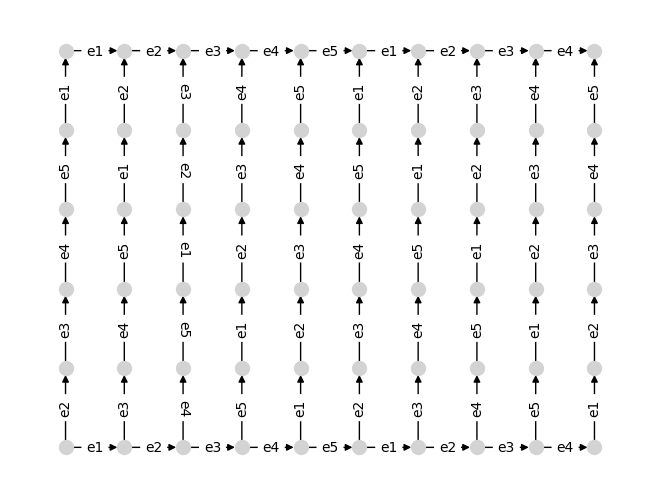

In [29]:
allVertsGraph = nx.DiGraph()
allVertsGraph = createNodes(allVertsGraph,arrAllVert)
allVertsGraph = createEdges(allVertsGraph,arrAllVert)
showGraph(allVertsGraph,rows,cols)

# ALL VERTICAL HEIGHTS

In [ ]:
# I dont think i need this!!

# allVertical = createTilingWeigthedEdges(allVertsGraph,GMAIN)
# nx.draw(allVertical, pos, with_labels=True, node_size=500, node_color="lightgray", edge_color="black", arrows=True)
# nx.draw_networkx_edge_labels(allVertical, pos, edge_labels, font_size=10)
# plt.show()

## check with flips!

In [13]:
heightsAllVerts = createHeightArray(6,9,allVertsGraph) 
printArr(heightsAllVerts)

[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0)]
[(-1, 0, 0, 0), (1, -1, 0, 0), (1, 1, -1, 0), (1, 1, 1, -1), (2, 2, 2, 2), (-1, 0, 0, 0), (1, -1, 0, 0), (1, 1, -1, 0), (1, 1, 1, -1)]
[(0, 1, 1, 1), (0, -1, 0, 0), (1, 0, -1, 0), (1, 1, 0, -1), (2, 2, 2, 1), (0, 1, 1, 1), (0, -1, 0, 0), (1, 0, -1, 0), (1, 1, 0, -1)]
[(0, 1, 1, 0), (1, 0, 1, 1), (0, 0, -1, 0), (1, 0, 0, -1), (2, 2, 1, 1), (0, 1, 1, 0), (1, 0, 1, 1), (0, 0, -1, 0), (1, 0, 0, -1)]
[(0, 1, 0, 0), (1, 0, 1, 0), (1, 1, 0, 1), (0, 0, 0, -1), (2, 1, 1, 1), (0, 1, 0, 0), (1, 0, 1, 0), (1, 1, 0, 1), (0, 0, 0, -1)]
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0)]


Original Array:
['  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ']
['tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle']
['middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ']
['bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle']
['bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ']
New Array:

[' left  ', 'lcenter', 'center ', 'rcenter', ' right ', '  top  ', '  top  ', '  top  ', '  top  ']
[' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle']
[' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'middle ', 'middle ', 'middle ', 'middle ']
[' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle']
[' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'bottom ', 'bott

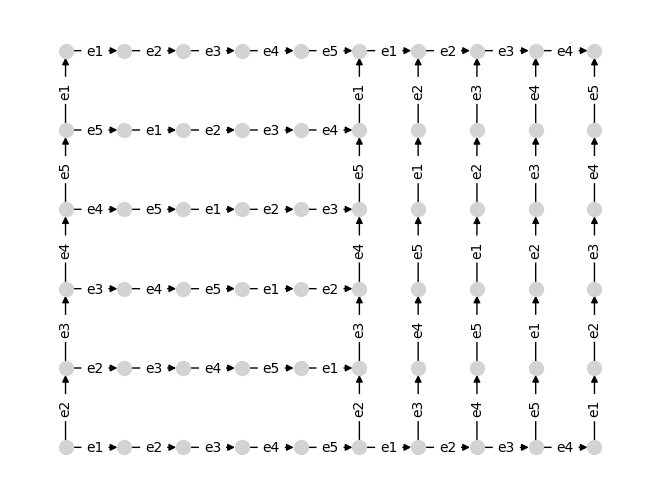

[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]
[(-1, 0, 0, 0), (-2, -1, -1, -1), (-1, -1, -1, -1), (-1, 0, -1, -1), (-1, 0, 0, -1), (-1, 0, 0, 0), (1, -1, 0, 0), (1, 1, -1, 0), (1, 1, 1, -1), (2, 2, 2, 2)]
[(0, 1, 1, 1), (0, 1, 1, 2), (-1, 0, 0, 1), (0, 0, 0, 1), (0, 1, 0, 1), (0, 1, 1, 1), (0, -1, 0, 0), (1, 0, -1, 0), (1, 1, 0, -1), (2, 2, 2, 1)]
[(0, 1, 1, 0), (0, 1, 2, 0), (0, 1, 2, 1), (-1, 0, 1, 0), (0, 0, 1, 0), (0, 1, 1, 0), (1, 0, 1, 1), (0, 0, -1, 0), (1, 0, 0, -1), (2, 2, 1, 1)]
[(0, 1, 0, 0), (0, 2, 0, 0), (0, 2, 1, 0), (0, 2, 1, 1), (-1, 1, 0, 0), (0, 1, 0, 0), (1, 0, 1, 0), (1, 1, 0, 1), (0, 0, 0, -1), (2, 1, 1, 1)]
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]


In [30]:
lmFliparr = flipVertToHor(0,0,arrAllVert)
print()
lmFlipGraph = nx.DiGraph()
lmFlipGraph = createNodes(lmFlipGraph,lmFliparr)
lmFlipGraph = createEdges(lmFlipGraph,lmFliparr)
showGraph(lmFlipGraph,rows,cols)
lmArr = createHeightArray(rows,cols,lmFlipGraph)
printArr(lmArr)

Original Array:
['  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ']
['tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle']
['middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ']
['bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle']
['bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ']
New Array:

['  top  ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', '  top  ', '  top  ', '  top  ']
['tmiddle', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'tmiddle', 'tmiddle', 'tmiddle']
['middle ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'middle ', 'middle ', 'middle ']
['bmiddle', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'bmiddle', 'bmiddle', 'bmiddle']
['bottom ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'bott

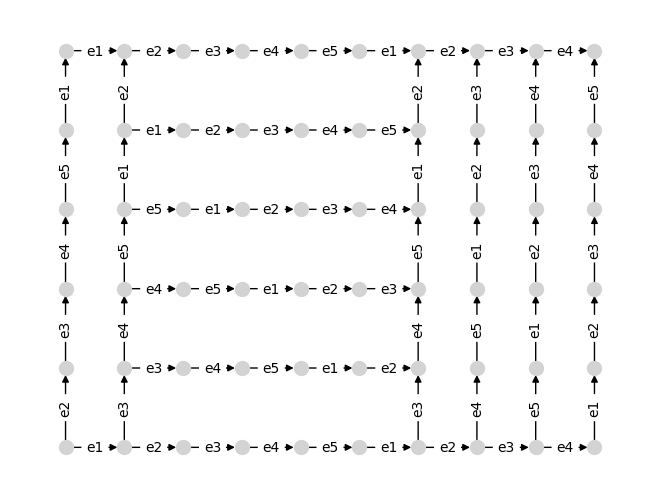

[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]
[(-1, 0, 0, 0), (1, -1, 0, 0), (2, -1, 0, 0), (2, 0, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (1, -1, 0, 0), (1, 1, -1, 0), (1, 1, 1, -1), (2, 2, 2, 2)]
[(0, 1, 1, 1), (0, -1, 0, 0), (-1, -2, -1, -1), (0, -2, -1, -1), (0, -1, -1, -1), (0, -1, 0, -1), (0, -1, 0, 0), (1, 0, -1, 0), (1, 1, 0, -1), (2, 2, 2, 1)]
[(0, 1, 1, 0), (1, 0, 1, 1), (1, 0, 1, 2), (0, -1, 0, 1), (1, -1, 0, 1), (1, 0, 0, 1), (1, 0, 1, 1), (0, 0, -1, 0), (1, 0, 0, -1), (2, 2, 1, 1)]
[(0, 1, 0, 0), (1, 0, 1, 0), (1, 0, 2, 0), (1, 0, 2, 1), (0, -1, 1, 0), (1, -1, 1, 0), (1, 0, 1, 0), (1, 1, 0, 1), (0, 0, 0, -1), (2, 1, 1, 1)]
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]


In [32]:
clFliparr = flipVertToHor(0,1,arrAllVert)
print()
clFlipGraph = nx.DiGraph()
clFlipGraph = createNodes(clFlipGraph,clFliparr)
clFlipGraph = createEdges(clFlipGraph,clFliparr)
showGraph(clFlipGraph,rows,cols)
clArr = createHeightArray(rows,cols,clFlipGraph)
printArr(clArr)

Original Array:
['  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ']
['tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle']
['middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ']
['bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle']
['bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ']
New Array:

['  top  ', '  top  ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', '  top  ', '  top  ']
['tmiddle', 'tmiddle', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'tmiddle', 'tmiddle']
['middle ', 'middle ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'middle ', 'middle ']
['bmiddle', 'bmiddle', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'bmiddle', 'bmiddle']
['bottom ', 'bottom ', ' left  ', 'lcenter', 'center ', 'rcenter', ' rig

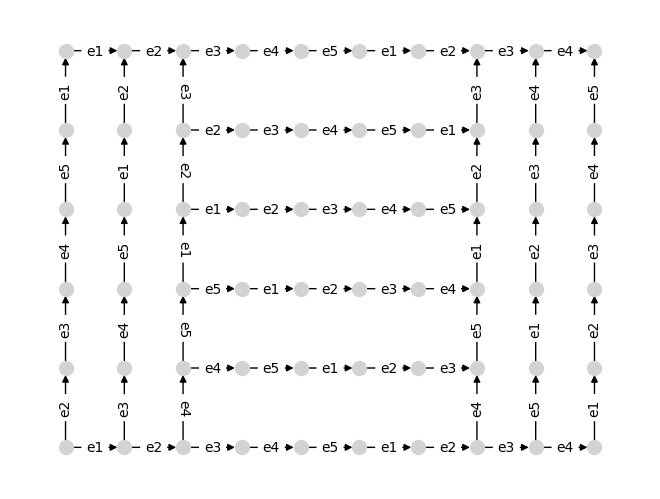

[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]
[(-1, 0, 0, 0), (1, -1, 0, 0), (1, 1, -1, 0), (1, 2, -1, 0), (1, 2, 0, 0), (1, 2, 0, 1), (0, 1, -1, 0), (1, 1, -1, 0), (1, 1, 1, -1), (2, 2, 2, 2)]
[(0, 1, 1, 1), (0, -1, 0, 0), (1, 0, -1, 0), (2, 0, -1, 0), (2, 1, -1, 0), (2, 1, 0, 0), (2, 1, 0, 1), (1, 0, -1, 0), (1, 1, 0, -1), (2, 2, 2, 1)]
[(0, 1, 1, 0), (1, 0, 1, 1), (0, 0, -1, 0), (-1, -1, -2, -1), (0, -1, -2, -1), (0, 0, -2, -1), (0, 0, -1, -1), (0, 0, -1, 0), (1, 0, 0, -1), (2, 2, 1, 1)]
[(0, 1, 0, 0), (1, 0, 1, 0), (1, 1, 0, 1), (1, 1, 0, 2), (0, 0, -1, 1), (1, 0, -1, 1), (1, 1, -1, 1), (1, 1, 0, 1), (0, 0, 0, -1), (2, 1, 1, 1)]
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]


In [33]:
cFliparr = flipVertToHor(0,2,arrAllVert)
print()
cFlipGraph = nx.DiGraph()
cFlipGraph = createNodes(cFlipGraph,cFliparr)
cFlipGraph = createEdges(cFlipGraph,cFliparr)
showGraph(cFlipGraph,rows,cols)
cArr = createHeightArray(rows,cols,cFlipGraph)
printArr(cArr)

Original Array:
['  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ']
['tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle']
['middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ']
['bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle']
['bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ']
New Array:

['  top  ', '  top  ', '  top  ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', '  top  ']
['tmiddle', 'tmiddle', 'tmiddle', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'tmiddle']
['middle ', 'middle ', 'middle ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'middle ']
['bmiddle', 'bmiddle', 'bmiddle', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ', 'bmiddle']
['bottom ', 'bottom ', 'bottom ', ' left  ', 'lcenter', 'center ', 'rcen

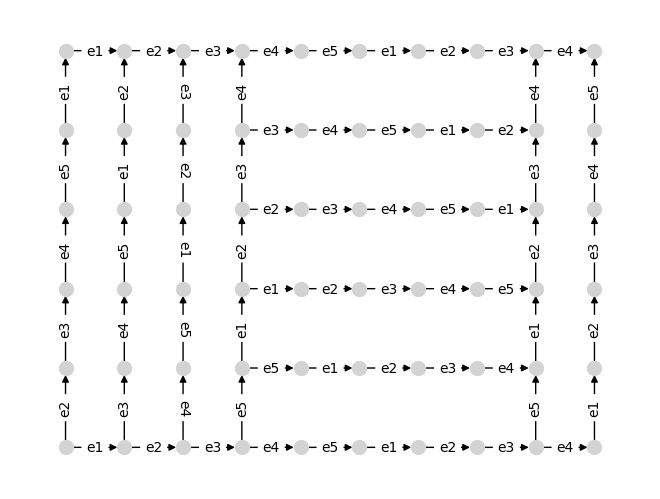

[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]
[(-1, 0, 0, 0), (1, -1, 0, 0), (1, 1, -1, 0), (1, 1, 1, -1), (1, 1, 2, -1), (1, 1, 2, 0), (0, 0, 1, -1), (1, 0, 1, -1), (1, 1, 1, -1), (2, 2, 2, 2)]
[(0, 1, 1, 1), (0, -1, 0, 0), (1, 0, -1, 0), (1, 1, 0, -1), (1, 2, 0, -1), (1, 2, 1, -1), (1, 2, 1, 0), (0, 1, 0, -1), (1, 1, 0, -1), (2, 2, 2, 1)]
[(0, 1, 1, 0), (1, 0, 1, 1), (0, 0, -1, 0), (1, 0, 0, -1), (2, 0, 0, -1), (2, 1, 0, -1), (2, 1, 1, -1), (2, 1, 1, 0), (1, 0, 0, -1), (2, 2, 1, 1)]
[(0, 1, 0, 0), (1, 0, 1, 0), (1, 1, 0, 1), (0, 0, 0, -1), (-1, -1, -1, -2), (0, -1, -1, -2), (0, 0, -1, -2), (0, 0, 0, -2), (0, 0, 0, -1), (2, 1, 1, 1)]
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]


In [34]:
crFliparr = flipVertToHor(0,3,arrAllVert)
print()
crFlipGraph = nx.DiGraph()
crFlipGraph = createNodes(crFlipGraph,crFliparr)
crFlipGraph = createEdges(crFlipGraph,crFliparr)
showGraph(crFlipGraph,rows,cols)
crArr = createHeightArray(rows,cols,crFlipGraph)
printArr(crArr)

Original Array:
['  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ', '  top  ']
['tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', 'tmiddle']
['middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ', 'middle ']
['bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', 'bmiddle']
['bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ', 'bottom ']
New Array:

['  top  ', '  top  ', '  top  ', '  top  ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ']
['tmiddle', 'tmiddle', 'tmiddle', 'tmiddle', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ']
['middle ', 'middle ', 'middle ', 'middle ', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ']
['bmiddle', 'bmiddle', 'bmiddle', 'bmiddle', ' left  ', 'lcenter', 'center ', 'rcenter', ' right ']
['bottom ', 'bottom ', 'bottom ', 'bottom ', ' left  ', 'lcenter', 'cent

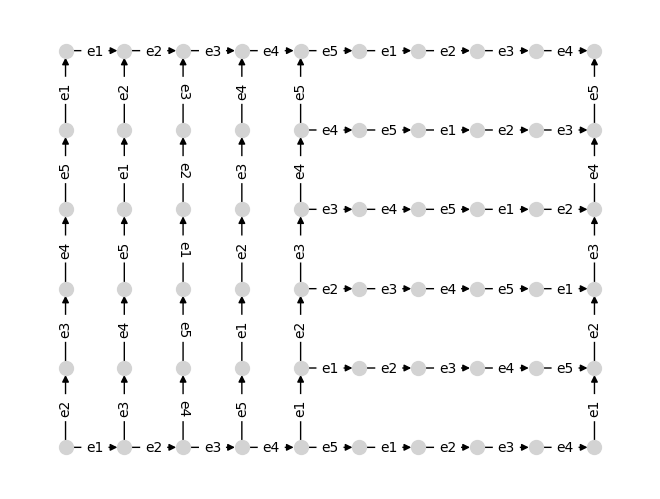

[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]
[(-1, 0, 0, 0), (1, -1, 0, 0), (1, 1, -1, 0), (1, 1, 1, -1), (2, 2, 2, 2), (2, 2, 2, 3), (1, 1, 1, 2), (2, 1, 1, 2), (2, 2, 1, 2), (2, 2, 2, 2)]
[(0, 1, 1, 1), (0, -1, 0, 0), (1, 0, -1, 0), (1, 1, 0, -1), (2, 2, 2, 1), (2, 2, 3, 1), (2, 2, 3, 2), (1, 1, 2, 1), (2, 1, 2, 1), (2, 2, 2, 1)]
[(0, 1, 1, 0), (1, 0, 1, 1), (0, 0, -1, 0), (1, 0, 0, -1), (2, 2, 1, 1), (2, 3, 1, 1), (2, 3, 2, 1), (2, 3, 2, 2), (1, 2, 1, 1), (2, 2, 1, 1)]
[(0, 1, 0, 0), (1, 0, 1, 0), (1, 1, 0, 1), (0, 0, 0, -1), (2, 1, 1, 1), (3, 1, 1, 1), (3, 2, 1, 1), (3, 2, 2, 1), (3, 2, 2, 2), (2, 1, 1, 1)]
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]


In [35]:
rmFliparr = flipVertToHor(0,4,arrAllVert)
print()
rmFlipGraph = nx.DiGraph()
rmFlipGraph = createNodes(rmFlipGraph,rmFliparr)
rmFlipGraph = createEdges(rmFlipGraph,rmFliparr)
showGraph(rmFlipGraph,rows,cols)
rmArr = createHeightArray(rows,cols,rmFlipGraph)
printArr(rmArr)

# SHOW HEIGHT FUNCTIONS

In [39]:
print("All Vertical Height Function")
printArr(heightsAllVerts)
print("Leftmost Flip Height Function")
printArr(lmArr)
print("Center Left Flip Height Function")
printArr(cArr)
print("Center Right Flip Height Function")
printArr(crArr)
print("Rightmost Flip Height Function")
printArr(rmArr)

All Vertical Height Function
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0)]
[(-1, 0, 0, 0), (1, -1, 0, 0), (1, 1, -1, 0), (1, 1, 1, -1), (2, 2, 2, 2), (-1, 0, 0, 0), (1, -1, 0, 0), (1, 1, -1, 0), (1, 1, 1, -1)]
[(0, 1, 1, 1), (0, -1, 0, 0), (1, 0, -1, 0), (1, 1, 0, -1), (2, 2, 2, 1), (0, 1, 1, 1), (0, -1, 0, 0), (1, 0, -1, 0), (1, 1, 0, -1)]
[(0, 1, 1, 0), (1, 0, 1, 1), (0, 0, -1, 0), (1, 0, 0, -1), (2, 2, 1, 1), (0, 1, 1, 0), (1, 0, 1, 1), (0, 0, -1, 0), (1, 0, 0, -1)]
[(0, 1, 0, 0), (1, 0, 1, 0), (1, 1, 0, 1), (0, 0, 0, -1), (2, 1, 1, 1), (0, 1, 0, 0), (1, 0, 1, 0), (1, 1, 0, 1), (0, 0, 0, -1)]
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0)]
Leftmost Flip Height Function
[(0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1), (0, 0, 0, 0), (1, 0, 0, 0), (1, 1, 0, 0), (1, 1, 1, 0), (1, 1, 1, 1)]
[(-1, 0, 0, 0), (-

## find differences

In [42]:
def differences(arr1,arr2):
    toReturn = [[None] * len(arr1[0]) for _ in range(len(arr1))]
    for i in range(len(arr1)):
        for j in range(len(arr1[0])):
            x = arr2[i][j][0] - arr1[i][j][0]
            y = arr2[i][j][1] - arr1[i][j][1]
            z = arr2[i][j][2] - arr1[i][j][2]
            w = arr2[i][j][3] - arr1[i][j][3]
            toReturn[i][j] = (x,y,z,w)

    return toReturn

In [43]:
print("Left Most Differences")
printArr(differences(heightsAllVerts,lmArr)) 
print("Center Left Differences")
printArr(differences(heightsAllVerts,clArr)) 
print("Center Differences")
printArr(differences(heightsAllVerts,cArr)) 
print("Center Right Differences")
printArr(differences(heightsAllVerts,crArr)) 
print("Right Most Differences")
printArr(differences(heightsAllVerts,rmArr)) 

Left Most Differences
[(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[(0, 0, 0, 0), (-3, 0, -1, -1), (-2, -2, 0, -1), (-2, -1, -2, 0), (-3, -2, -2, -3), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[(0, 0, 0, 0), (0, 2, 1, 2), (-2, 0, 1, 1), (-1, -1, 0, 2), (-2, -1, -2, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[(0, 0, 0, 0), (-1, 1, 1, -1), (0, 1, 3, 1), (-2, 0, 1, 1), (-2, -2, 0, -1), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[(0, 0, 0, 0), (-1, 2, -1, 0), (-1, 1, 1, -1), (0, 2, 1, 2), (-3, 0, -1, -1), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
Center Left Differences
[(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)]
[(0, 0, 0, 0), (0, 0, 0, 0), (1, 

In [ ]:
printArr(differences(heightsAllVerts,mArr)) 

In [ ]:
printArr(differences(heightsAllVerts,rmArr)) 

# BIGGER GRAPH (6X5)

In [ ]:
allVertArrBIG = [[t,t,t,t,t],[m,m,m,m,m],[b,b,b,b,b],[t,t,t,t,t],[m,m,m,m,m],[b,b,b,b,b]]

In [ ]:
GMAINBIG = nx.DiGraph()
possibleLables = ["e1","e2","e3"]

rows=7
cols=6
for i in range(rows):
    for j in range(cols):
        node = (i, j)
        GMAINBIG.add_node(node)

for i in range(rows):
    for j in range(cols): 
        node = (i,j)
        if (j!=cols-1):
            neighbor = (i,j+1)
            GMAINBIG.add_edge(node,neighbor)
            if i%3 == 0:
                GMAINBIG[node][neighbor]['label'] = possibleLables[(3+j)%3]
            if i%3 == 1:
                GMAINBIG[node][neighbor]['label'] = possibleLables[(2+j)%3]
            if i%3 == 2:
                GMAINBIG[node][neighbor]['label'] = possibleLables[(1+j)%3]
        if i != rows-1:
            neighbor = (i+1,j)
            GMAINBIG.add_edge(neighbor,node)
            if j%3 == 0:
                GMAINBIG[neighbor][node]['label'] = possibleLables[(3-i)%3]
            if j%3 == 1:
                GMAINBIG[neighbor][node]['label'] = possibleLables[(1-i)%3]
            if j%3 == 2:
                GMAINBIG[neighbor][node]['label'] = possibleLables[(2-i)%3]

edge_labels = {(u, v): GMAINBIG[u][v]['label'] for u, v in GMAINBIG.edges()}
                
pos = {(i, j): (j, -i) for i in range(rows) for j in range(cols)}  # Invert y for proper orientation
nx.draw(GMAINBIG, pos, with_labels=False, node_size=100, node_color="lightgray", edge_color="black", arrows=True)
nx.draw_networkx_edge_labels(GMAINBIG, pos, edge_labels=edge_labels, font_size=10)
plt.show()   

In [ ]:
rows = 7
cols = 6
allVertFlipGraphBIG = nx.DiGraph()
allVertFlipGraphBIG = createNodes(allVertFlipGraphBIG,allVertArrBIG)
allVertFlipGraphBIG = createEdges(allVertFlipGraphBIG,allVertArrBIG)
showGraph(allVertFlipGraphBIG,rows,cols)
allVertsHeightsBIG = createHeightArray(rows,cols,allVertFlipGraphBIG)
printArr(allVertsHeightsBIG)
heightsDict = {}
heightsDict["allVerticalBIG"] = allVertsHeightsBIG

In [ ]:
flip1 = flipVertToHor(0,1,allVertArrBIG)
flip2 = flipVertToHor(3,1,flip1)
after2flipsGraph = nx.DiGraph()
after2flipsGraph = createNodes(after2flipsGraph,flip2)
after2flipsGraph = createEdges(after2flipsGraph,flip2)
showGraph(after2flipsGraph,rows,cols)
after2flipsHeights = createHeightArray(rows,cols,after2flipsGraph)
printArr(after2flipsHeights)

In [ ]:
printArr(differences(allVertsHeightsBIG,after2flipsHeights))

In [ ]:
flip3 = flipHorToVert(1,1,flip2)

In [ ]:
after3flipsGraph = nx.DiGraph()
after3flipsGraph = createNodes(after3flipsGraph,flip3)
after3flipsGraph = createEdges(after3flipsGraph,flip3)
showGraph(after3flipsGraph,rows,cols)
after3flipsHeights = createHeightArray(rows,cols,after3flipsGraph)
printArr(after3flipsHeights)

In [ ]:
printArr(differences(allVertsHeightsBIG,after3flipsHeights)) # INTERESTING

In [ ]:
printArr(differences(after2flipsHeights,after3flipsHeights)) 